In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

Lets load required libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('C:/breast-cancer-wisconsin-data/data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### Let’s see how many of each class is in our data set 

In [3]:
df['radius_mean'].value_counts()

print(df.shape)


(569, 33)


In [4]:
def diagnosis_value(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0
  
    df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)
    df.drop(['Unnamed: 32','id'],axis=1)

### Feature set

Lets define feature sets, X:

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <a list of 10 Patch objects>)

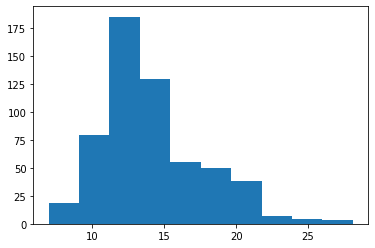

In [5]:
plt.hist(df['radius_mean'])

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [6]:
X = df[[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] .values  #.astype(float)
X[0:4]
y= np.array(df['diagnosis'])

What are our labels?

## Normalize Data 

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.48757756e+00, -2.14001647e-01,  1.31686157e+00,
         7.24026158e-01,  6.60819941e-01,  1.14875667e+00,
         9.07083081e-01,  1.88668963e+00, -1.35929347e+00,
         2.30360062e+00,  2.00123749e+00,  1.30768627e+00,
         2.61666502e+00,  2.10952635e+00,  2.29607613e+00,
         2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         7.42401948e-01, -6.05350847e-01, -6.92926270e-01,
        -4.40780058e-01,  2.60162067e-01, -8.05450380e-01,
        -9.94437403e-02,  1.80592744e+00, -3.69203222e-01,
         1.53

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 29) (455,)
Test set: (114, 29) (114,)


<div id="classification">
    <h2>Classification</h2>
</div>

<h3>K nearest neighbor (KNN)</h3>

#### Import library 

Classifier implementing the k-nearest neighbors vote.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Lets start the algorithm with k=4 for now:

In [10]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')


### Predicting
we can use the model to predict the test set:

In [11]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['B', 'B', 'B', 'B', 'M'], dtype=object)

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [12]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9714285714285714
Test set Accuracy:  0.9473684210526315


In [14]:
# write your code here
k=6
neigh1=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
print(neigh1)
#predicting
yhat6=neigh1.predict(X_test)
print('Train Accuracy is : ',metrics.accuracy_score(y_train, neigh1.predict(X_train)))
print('test accuracy is : ', metrics.accuracy_score(y_test, yhat6))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')
Train Accuracy is :  0.9714285714285714
test accuracy is :  0.9649122807017544


In [15]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95614035, 0.94736842, 0.95614035, 0.94736842, 0.96491228,
       0.96491228, 0.96491228, 0.96491228, 0.96491228])

#### Plot  model accuracy  for Different number of Neighbors 

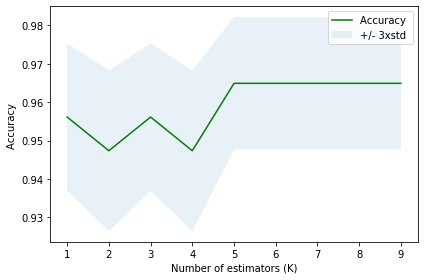

In [16]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of estimators (K)')
plt.tight_layout()
plt.show()

In [17]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9649122807017544 with k= 5
